# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [82]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats




## Cargar datos

In [83]:
# Carga los archivos de datos en diferentes DataFrames
datos_de_las_llamadas = pd.read_csv('../datasets/megaline_calls.csv') # datos de las llamadas
datos_de_internet = pd.read_csv('../datasets/megaline_internet.csv') #datos de internet
datos_de_mensajes = pd.read_csv('../datasets/megaline_messages.csv') #datos de mensajes
datos_de_planes = pd.read_csv('../datasets/megaline_plans.csv') #datos de planes/tarifas
datos_usuarios = pd.read_csv('../datasets/megaline_users.csv') #datos de usuarios





In [84]:
import os #buscando archivos 
print("Directorio actual:", os.getcwd())
print("Archivos en el directorio:")
for archivo in os.listdir():
    print(f"  - {archivo}")

Directorio actual: /app
Archivos en el directorio:
  - .ipynb_checkpoints
  - notebook.ipynb


In [85]:
import os #buscar los archivos en otras carpetas
print("Contenido del directorio padre:")
try:
    for archivo in os.listdir(".."):
        print(f"  - {archivo}")
except:
    print("No se puede acceder al directorio padre")

Contenido del directorio padre:
  - bin
  - boot
  - dev
  - etc
  - home
  - lib
  - lib64
  - media
  - mnt
  - opt
  - proc
  - root
  - run
  - sbin
  - srv
  - sys
  - tmp
  - usr
  - var
  - testlibs
  - datasets
  - .venv
  - .scripts
  - app
  - bins
  - .misc
  - .agent


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [86]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
datos_de_planes.head()



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [87]:
# Imprime una muestra de los datos para las tarifas
print("Informacion general del DataFrame:")
datos_de_planes.info()



Informacion general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


# [Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
# Puedo ver que hay 2 tipos de planes el "surf" y el "ultimate" con diferentes características:
# El plan surf es de 20 dolares al mes contiene 500 minutos , 1000 mensajes y 30 GB, mientas que el plan ultimate cuesta 70 dolares al mes contiene 3000 minutos, 1000 mensajes y 30 GB  
# En la informacíon del DataFrame como tal puedo ver que tengo 2 filas de datos (supongo que son ambos planes), 8 columnas con diferentes características:
# int64: mensajes incluídos en el plan, megabytes incluídos por mes. minutos incluídos en el plan , precio mensual en dolares y el costo por minuto adicional.
# float64: costo por mensaje adicional y costo por minuto adicional.
# object: nombre del plan.
# Non-Null Count: 2 significa que no hay valores faltantes y todas las celdas tienen datos válidos.
# memory usage: nos dice la cantidad de memoria que ocupa este DataFrame que son 256.0 bytes que es muy poca porque solo ocupa 2 filas 






## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]



In [88]:
print("Datos de planes") #examina los valores actuales
print(datos_de_planes)

Datos de planes
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


In [89]:
print("Conversíon de MB a GB:")  #Convertir MB a GB # 1 GB =1024 MB
print(f"Plan 1:{15360}MB ={15360/1024} GB")
print(f"plan 2: {30720} MB ={30720/1024}GB")

Conversíon de MB a GB:
Plan 1:15360MB =15.0 GB
plan 2: 30720 MB =30.0GB


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [90]:
datos_de_planes['gb_per_month_included'] = datos_de_planes['mb_per_month_included'] / 1024  #convertir MB a GB 

In [91]:
datos_de_planes['cost_per_minute_included'] = datos_de_planes['usd_monthly_pay'] / datos_de_planes['minutes_included'] #Costo por unidad incluida
datos_de_planes['cost_per_message_included'] = datos_de_planes['usd_monthly_pay'] / datos_de_planes['messages_included']

In [92]:
datos_de_planes['price_category'] = datos_de_planes['usd_monthly_pay'].apply(
    lambda x: 'Económico' if x < 50 else 'Premium'
)  #clasificar planes por precio

## Usuarios/as

In [93]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
print("Información general del Dtaframe de usuarios:")
datos_usuarios.info()


Información general del Dtaframe de usuarios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [94]:
# Imprime una muestra de datos para usuarios

print("Información de usuarios:")
datos_usuarios.head()



Información de usuarios:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
# En el DataFrame hay 8 columnas de las cuales:
# int64 identificador único de cada usuario y el otro edad del usuario 
# object es el nombre del usuario , el otro el apellido, ciudad donde vive el usuario , también esta el plan contratado 
# datetime64 fecha del reguistro de usuario y fecha de cuando el usuario cancelo el servicio.
# En la información general podemos observar el tamaño de los datos :
# Todas las columnas tienen 500 valores excepto churn_date
# Solo 34 usuarios tienen ccancelaron el servicio 
# 466 usuarios siguen activos

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [95]:
datos_usuarios['reg_date']=pd.to_datetime(datos_usuarios['reg_date']) # correccion de fechas
datos_usuarios['churn_date']=pd.to_datetime(datos_usuarios['churn_date'])

In [96]:
print("Planes en datos_usuarios:",datos_usuarios['plan'].unique())  #verificar la consistencia en los planes
print("Planes en datos_de_planes:",datos_de_planes['plan_name'].unique())

Planes en datos_usuarios: ['ultimate' 'surf']
Planes en datos_de_planes: ['surf' 'ultimate']


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [97]:
datos_usuarios['reg_year'] = datos_usuarios['reg_date'].dt.year
datos_usuarios['reg_month'] = datos_usuarios['reg_date'].dt.month
datos_usuarios['reg_quarter'] = datos_usuarios['reg_date'].dt.quarter  #informacion de cuando se registraron

In [98]:
datos_usuarios['days_as_customer'] = (pd.Timestamp('2018-12-31') - datos_usuarios['reg_date']).dt.days  # calcular días como cliente activo

In [99]:
datos_usuarios['actual_customer_duration'] = datos_usuarios.apply(
    lambda row: (row['churn_date'] - row['reg_date']).days if pd.notna(row['churn_date']) 
    else (pd.Timestamp('2018-12-31') - row['reg_date']).days, axis=1
)  # usuarios que cancelaron , calcular la duración real

In [100]:
datos_usuarios['age_group'] = pd.cut(datos_usuarios['age'], 
                                   bins=[0, 25, 35, 50, 100], 
                                   labels=['Joven', 'Adulto Joven', 'Adulto', 'Mayor'])  # categorizar por edad 
datos_usuarios['customer_status'] = datos_usuarios['churn_date'].apply(
    lambda x: 'Cancelado' if pd.notna(x) else 'Activo'
)  # categorizar por estado del cliente

## Llamadas

In [101]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print("Informacion general del DataFrame llamadas ")
datos_de_las_llamadas.info()


Informacion general del DataFrame llamadas 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [102]:
# Imprime una muestra de datos para las llamadas
print("Información de las llamadas")
datos_de_las_llamadas.head()



Información de las llamadas


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
# Tiene 4 columnas disponibles :
# object identificador único de cada llamada 
# int 64 identificador del usuario que hizo la llamada 
# datetime64 fecha cuando se realizo la llamada 
# float duración de la llamada en minutos
# información general
# Tamaño de los datos, 137,735 llamadas registradas en total , hay 4 colunmas de información y la memoria utilizada es de 4.2 MB 
# calidad de los datos : no hay valores nulos (todas las columnas tienen 137,735 valores)
#

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [103]:
datos_de_las_llamadas['call_date']=pd.to_datetime(datos_de_las_llamadas['call_date']) # convertir la fecha

In [104]:
print("Estadísticas de duraciòn:")  #ver si hay duraciones negativas
print(datos_de_las_llamadas['duration'].describe())
print("Llamadas con duración <=0:")  # ver valores negativos 
print(datos_de_las_llamadas[datos_de_las_llamadas['duration'] <= 0].shape[0])

Estadísticas de duraciòn:
count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64
Llamadas con duración <=0:
26834


In [105]:
print("Valores nulos por columna:")
print(datos_de_las_llamadas.isnull().sum())

Valores nulos por columna:
id           0
user_id      0
call_date    0
duration     0
dtype: int64


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [106]:
datos_de_las_llamadas['call_year'] = datos_de_las_llamadas['call_date'].dt.year
datos_de_las_llamadas['call_month'] = datos_de_las_llamadas['call_date'].dt.month
datos_de_las_llamadas['call_day'] = datos_de_las_llamadas['call_date'].dt.day
datos_de_las_llamadas['call_weekday'] = datos_de_las_llamadas['call_date'].dt.dayofweek
datos_de_las_llamadas['call_quarter'] = datos_de_las_llamadas['call_date'].dt.quarter   # extraer información de fecha y tiempo

In [107]:
datos_de_las_llamadas['call_type'] = datos_de_las_llamadas['duration'].apply(
    lambda x: 'Fallida' if x <= 0 
    else 'Corta' if x <= 2 
    else 'Media' if x <= 10 
    else 'Larga'
)  #clasificar llamadas por duraciòn 

## Mensajes

In [108]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print("Información general del DataFrame de mensajes")
datos_de_mensajes.info()



Información general del DataFrame de mensajes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [109]:
# Imprime una muestra de datos para los mensajes
print("Informacion de los mensajes")
datos_de_mensajes.head()


Informacion de los mensajes


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
# Hay 3 colunmas disponibles:
# object identificador único de cada mensaje
# int64 identificador del usuario que envío el mensaje
# datetime64 fecha cuando se envió el mensaje 
# información general :
# tamaño de los datos es de 76,051 mensajes reguistrados en total , 3 colunmas de información , memoria utilizada 1.7 MB
# calidad de datos:
# no hay valores nulos 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [110]:
datos_de_mensajes['message_date']=pd.to_datetime(datos_de_mensajes['message_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [111]:
datos_de_mensajes['message_year'] = datos_de_mensajes['message_date'].dt.year
datos_de_mensajes['message_month'] = datos_de_mensajes['message_date'].dt.month
datos_de_mensajes['message_day'] = datos_de_mensajes['message_date'].dt.day
datos_de_mensajes['message_weekday'] = datos_de_mensajes['message_date'].dt.dayofweek
datos_de_mensajes['message_quarter'] = datos_de_mensajes['message_date'].dt.quarter   #extraer información de fecha y tiempo

In [112]:
datos_de_mensajes['day_type'] = datos_de_mensajes['message_weekday'].apply(
    lambda x: 'Fin de semana' if x >= 5 else 'Día laboral'
)   # crear categorias de días de la semana 

## Internet

In [114]:
# Imprime la información general/resumida sobre el DataFrame de internet
print("Información general del DataFrame de internet")
datos_de_internet.info()



Información general del DataFrame de internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [115]:
# Imprime una muestra de datos para el tráfico de internet
print("Información de internet")
datos_de_internet.head()




Información de internet


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
# tamaño 104,825 registros o filas , hay 4 colunmas en total, y de memoria se utuliza 3.2MB 
# object identificador único de cada sesión de internet 
# int64 identificador del usuario que realizo la sesión 
# datetime64 fecha de la sesión de internet
# no hay valores nulos 
# los primeros 5 registros muestran que: el usuario 1000 tuvo varias sesiones entre el 26 y 31 de diciembre del 2018 , el consumo varia desde 0.00MB hasta 880.22 MB por sesión y hay sesiones con 0MB de consumo 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [116]:
datos_de_internet['session_date']=pd.to_datetime(datos_de_internet['session_date']) # conversion de fecha faltante

In [117]:
print("Estadísticas de uso de MB:")
print(datos_de_internet['mb_used'].describe())
print("\nSesiones con 0 MB:")
print(datos_de_internet[datos_de_internet['mb_used'] == 0].shape[0])
print("\nValores negativos (si los hay):")
print(datos_de_internet[datos_de_internet['mb_used'] < 0].shape[0])

Estadísticas de uso de MB:
count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

Sesiones con 0 MB:
13747

Valores negativos (si los hay):
0


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [118]:
datos_de_internet['session_year'] = datos_de_internet['session_date'].dt.year
datos_de_internet['session_month'] = datos_de_internet['session_date'].dt.month
datos_de_internet['session_day'] = datos_de_internet['session_date'].dt.day
datos_de_internet['session_weekday'] = datos_de_internet['session_date'].dt.dayofweek
datos_de_internet['session_quarter'] = datos_de_internet['session_date'].dt.quarter   # extraer información de fecha y tiempo 

In [119]:
datos_de_internet['gb_used'] = datos_de_internet['mb_used'] / 1024   # convertir MB a GB 

In [120]:
datos_de_internet['session_type'] = datos_de_internet['mb_used'].apply(
    lambda x: 'Sin uso' if x == 0 
    else 'Ligero' if x <= 100 
    else 'Moderado' if x <= 500 
    else 'Intensivo'
)   # clasificar sesiones por volumenes de datos 

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [121]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
datos_de_las_llamadas['year'] = datos_de_las_llamadas['call_date'].dt.year
datos_de_las_llamadas['month'] = datos_de_las_llamadas['call_date'].dt.month  # para llamadas
datos_de_mensajes['year'] = datos_de_mensajes['message_date'].dt.year
datos_de_mensajes['month'] = datos_de_mensajes['message_date'].dt.month   #para mensajes
datos_de_internet['year'] = datos_de_internet['session_date'].dt.year
datos_de_internet['month'] = datos_de_internet['session_date'].dt.month   #para internet


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [122]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
datos_de_las_llamadas.groupby(['user_id', 'year', 'month']).size()
llamadas_por_usuario_mes = datos_de_las_llamadas.groupby(['user_id', 'year', 'month']).size()

In [123]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

datos_de_las_llamadas.groupby(['user_id','year','month'])['duration'].sum()

minutos_por_usuario_mes = datos_de_las_llamadas.groupby(['user_id','year','month'])['duration'].sum()

In [124]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

datos_de_mensajes.groupby(['user_id', 'month' , 'year']).size()
mensajes_por_usuario_mes = datos_de_mensajes.groupby(['user_id', 'month', 'year']).size()


In [125]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
trafico_por_usuario_mes = datos_de_internet.groupby(['user_id','year', 'month'])['mb_used'].sum()

trafico_por_usuario_mes = datos_de_internet.groupby(['user_id','year', 'month'])['mb_used'].sum()

[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [126]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
print("Llamadas por usuario-mes:")
print(llamadas_por_usuario_mes.head())
print("\nMinutos por usuario-mes:")
print(minutos_por_usuario_mes.head())
print("\nMensajes por usuario-mes:")
print(mensajes_por_usuario_mes.head())
print("\nTráfico por usuario-mes:")
print(trafico_por_usuario_mes.head())


Llamadas por usuario-mes:
user_id  year  month
1000     2018  12       16
1001     2018  8        27
               9        49
               10       65
               11       64
dtype: int64

Minutos por usuario-mes:
user_id  year  month
1000     2018  12       116.83
1001     2018  8        171.14
               9        297.69
               10       374.11
               11       404.59
Name: duration, dtype: float64

Mensajes por usuario-mes:
user_id  month  year
1000     12     2018    11
1001     8      2018    30
         9      2018    44
         10     2018    53
         11     2018    36
dtype: int64

Tráfico por usuario-mes:
user_id  year  month
1000     2018  12        1901.47
1001     2018  8         6919.15
               9        13314.82
               10       22330.49
               11       18504.30
Name: mb_used, dtype: float64


In [127]:

# Primero, asegurémonos de que todos los índices tengan el mismo orden
llamadas_por_usuario_mes = datos_de_las_llamadas.groupby(['user_id', 'year', 'month']).size()
minutos_por_usuario_mes = datos_de_las_llamadas.groupby(['user_id', 'year', 'month'])['duration'].sum()
mensajes_por_usuario_mes = datos_de_mensajes.groupby(['user_id', 'year', 'month']).size()
trafico_por_usuario_mes = datos_de_internet.groupby(['user_id', 'year', 'month'])['mb_used'].sum()

# Ahora crear el DataFrame consolidado
df_consolidado = pd.DataFrame({
    'calls': llamadas_por_usuario_mes,
    'minutes': minutos_por_usuario_mes,
    'messages': mensajes_por_usuario_mes,
    'mb_used': trafico_por_usuario_mes
})

In [128]:
df_consolidado = df_consolidado.fillna(0)   #rellenar valores faltantes con 0 (ya que son los usuarios que no usaron ningun servicio)

In [129]:
df_consolidado = df_consolidado.reset_index()   # resetear el indice para tener user_id, year,month  como columnas

In [130]:
print("DataFrame consolidado:")
print(df_consolidado.head(10))
print(f"\nForma del DataFrame: {df_consolidado.shape}")   #este codigo combina todos los dataframe, rellena con 0 los valores faltantes(cuando el usuario no uso un servicio)y convierte el índice en columnas normales

DataFrame consolidado:
   user_id  year  month  calls  minutes  messages   mb_used
0     1000  2018     12   16.0   116.83      11.0   1901.47
1     1001  2018      8   27.0   171.14      30.0   6919.15
2     1001  2018      9   49.0   297.69      44.0  13314.82
3     1001  2018     10   65.0   374.11      53.0  22330.49
4     1001  2018     11   64.0   404.59      36.0  18504.30
5     1001  2018     12   56.0   392.93      44.0  19369.18
6     1002  2018     10   11.0    54.13      15.0   6552.01
7     1002  2018     11   55.0   359.76      32.0  19345.08
8     1002  2018     12   47.0   363.24      41.0  14396.24
9     1003  2018     12  149.0  1041.00      50.0  27044.14

Forma del DataFrame: (2293, 7)


In [131]:
# Añade la información de la tarifa
print("Información de usuarios (primeras 5 filas):")
print(datos_usuarios[['user_id', 'plan']].head())    #verificar la estructura de los datos de usuarios 


Información de usuarios (primeras 5 filas):
   user_id      plan
0     1000  ultimate
1     1001      surf
2     1002      surf
3     1003      surf
4     1004      surf


In [132]:
print("\nInformación de planes:")
print(datos_de_planes)


Información de planes:
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  cost_per_minute_included  cost_per_message_included  \
0                   15.0                  0.040000                       0.40   
1                   30.0                  0.023333                       0.07   

  price_category  
0      Económico  
1        Premium  


In [133]:
df_consolidado = df_consolidado.merge(
    datos_usuarios[['user_id', 'plan']], 
    on='user_id', 
    how='left'
)                #añadir informacion del plan de cada usuario 

In [134]:
print("DataFrame con información de planes:")
print(df_consolidado.head())

DataFrame con información de planes:
   user_id  year  month  calls  minutes  messages   mb_used      plan
0     1000  2018     12   16.0   116.83      11.0   1901.47  ultimate
1     1001  2018      8   27.0   171.14      30.0   6919.15      surf
2     1001  2018      9   49.0   297.69      44.0  13314.82      surf
3     1001  2018     10   65.0   374.11      53.0  22330.49      surf
4     1001  2018     11   64.0   404.59      36.0  18504.30      surf


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [135]:
# Calcula el ingreso mensual para cada usuario
print("Columnas del DataFrame consolidado:")
print(df_consolidado.columns.tolist())
print("\nPrimeras filas:")
print(df_consolidado.head())     #primero verifico la estructura actual 


Columnas del DataFrame consolidado:
['user_id', 'year', 'month', 'calls', 'minutes', 'messages', 'mb_used', 'plan']

Primeras filas:
   user_id  year  month  calls  minutes  messages   mb_used      plan
0     1000  2018     12   16.0   116.83      11.0   1901.47  ultimate
1     1001  2018      8   27.0   171.14      30.0   6919.15      surf
2     1001  2018      9   49.0   297.69      44.0  13314.82      surf
3     1001  2018     10   65.0   374.11      53.0  22330.49      surf
4     1001  2018     11   64.0   404.59      36.0  18504.30      surf


In [136]:
df_consolidado_limpio = df_consolidado[
    (df_consolidado['month'] <= 12) & 
    (df_consolidado['year'] == 2018)
].copy()     #filtrar solo las filas correctas donde month <= 12 y year = 2018

print("DataFrame limpio:")
print(df_consolidado_limpio.head())
print(f"Filas originales: {len(df_consolidado)}")
print(f"Filas después de limpiar: {len(df_consolidado_limpio)}")

DataFrame limpio:
   user_id  year  month  calls  minutes  messages   mb_used      plan
0     1000  2018     12   16.0   116.83      11.0   1901.47  ultimate
1     1001  2018      8   27.0   171.14      30.0   6919.15      surf
2     1001  2018      9   49.0   297.69      44.0  13314.82      surf
3     1001  2018     10   65.0   374.11      53.0  22330.49      surf
4     1001  2018     11   64.0   404.59      36.0  18504.30      surf
Filas originales: 2293
Filas después de limpiar: 2293


In [137]:
df_consolidado.columns = ['user_id', 'month', 'year', 'calls', 'minutes', 'messages', 'mb_used', 'plan']
print("DataFrame corregido:")
print(df_consolidado.head())   # 2 corrigo los nombres de las columnas 

DataFrame corregido:
   user_id  month  year  calls  minutes  messages   mb_used      plan
0     1000   2018    12   16.0   116.83      11.0   1901.47  ultimate
1     1001   2018     8   27.0   171.14      30.0   6919.15      surf
2     1001   2018     9   49.0   297.69      44.0  13314.82      surf
3     1001   2018    10   65.0   374.11      53.0  22330.49      surf
4     1001   2018    11   64.0   404.59      36.0  18504.30      surf


In [138]:
# paso 3 calcular los ingresos mensuales, empezar con plsan surf para ver si algún usuario exedio sus limites
usuario_surf = df_consolidado[df_consolidado['plan'] == 'surf'].head(1)
print("Ejemplo de usuario con plan surf:")
print(usuario_surf)   #ver un usuario especifico del plan surf


Ejemplo de usuario con plan surf:
   user_id  month  year  calls  minutes  messages  mb_used  plan
1     1001   2018     8   27.0   171.14      30.0  6919.15  surf


In [139]:
print("Información de los planes:")
print(datos_de_planes[['plan_name', 'usd_monthly_pay', 'minutes_included', 
                       'messages_included', 'mb_per_month_included', 
                       'usd_per_minute', 'usd_per_message', 'usd_per_gb']])   # verificar que tenemos los datos de planes 

Información de los planes:
  plan_name  usd_monthly_pay  minutes_included  messages_included  \
0      surf               20               500                 50   
1  ultimate               70              3000               1000   

   mb_per_month_included  usd_per_minute  usd_per_message  usd_per_gb  
0                  15360            0.03             0.03          10  
1                  30720            0.01             0.01           7  


In [140]:
def calcular_excesos(minutos_usados, mensajes_usados, mb_usados, plan):
    """
    Calcula los excesos de uso comparado con los límites del plan
    """
    # Obtener los límites del plan
    if plan == 'surf':
        limite_minutos = 500
        limite_mensajes = 50
        limite_mb = 15360  # 15 GB
    else:  # ultimate
        limite_minutos = 3000
        limite_mensajes = 1000
        limite_mb = 30720  # 30 GB
    
    # Calcular excesos (si es negativo, no hay exceso)
    exceso_minutos = max(0, minutos_usados - limite_minutos)
    exceso_mensajes = max(0, mensajes_usados - limite_mensajes)
    exceso_mb = max(0, mb_usados - limite_mb)
    
    return exceso_minutos, exceso_mensajes, exceso_mb

In [141]:
def calcular_ingresos_mensuales(df):
    """
    Calcula los ingresos mensuales para todos los usuarios
    """
    # Crear una copia para no modificar el original
    df_ingresos = df.copy()
    
    # Inicializar columna de ingresos
    df_ingresos['monthly_revenue'] = 0.0
    
    return df_ingresos

In [142]:
def calcular_ingresos_mensuales(df):
    """
    Calcula los ingresos mensuales para todos los usuarios
    """
    df_ingresos = df.copy()
    
    # Para cada fila (usuario-mes)
    for index, row in df_ingresos.iterrows():
        plan = row['plan']
        
        # 1. Tarifa base mensual
        if plan == 'surf':
            tarifa_base = 20
            tarifa_minuto = 0.03
            tarifa_mensaje = 0.03
            tarifa_gb = 10
        else:  # ultimate
            tarifa_base = 70
            tarifa_minuto = 0.01
            tarifa_mensaje = 0.01
            tarifa_gb = 7
        
        # 2. Calcular excesos
        exceso_minutos, exceso_mensajes, exceso_mb = calcular_excesos(
            row['minutes'],    # minutos usados
            row['messages'],   # mensajes usados
            row['mb_used'],    # mb usados
            row['plan']        # plan
        )
        
        # 3. Calcular cargos adicionales
        cargo_minutos = exceso_minutos * tarifa_minuto
        cargo_mensajes = exceso_mensajes * tarifa_mensaje
        cargo_mb = (exceso_mb / 1024) * tarifa_gb  # Convertir MB a GB
        
        # 4. Ingreso total = tarifa_base + cargos_adicionales
        ingreso_total = tarifa_base + cargo_minutos + cargo_mensajes + cargo_mb
        df_ingresos.loc[index, 'monthly_revenue'] = ingreso_total
    
    return df_ingresos


In [143]:
df_con_ingresos = calcular_ingresos_mensuales(df_consolidado)  #calcular ingresos

In [144]:
print("DataFrame con ingresos calculados:")
print(df_con_ingresos.head())

# Verificar que no hay valores nulos
print("\nValores nulos en monthly_revenue:")
print(df_con_ingresos['monthly_revenue'].isnull().sum())

DataFrame con ingresos calculados:
   user_id  month  year  calls  minutes  messages   mb_used      plan  \
0     1000   2018    12   16.0   116.83      11.0   1901.47  ultimate   
1     1001   2018     8   27.0   171.14      30.0   6919.15      surf   
2     1001   2018     9   49.0   297.69      44.0  13314.82      surf   
3     1001   2018    10   65.0   374.11      53.0  22330.49      surf   
4     1001   2018    11   64.0   404.59      36.0  18504.30      surf   

   monthly_revenue  
0        70.000000  
1        20.000000  
2        20.000000  
3        88.161191  
4        50.706055  

Valores nulos en monthly_revenue:
0


In [145]:
print("Ingresos promedio por plan:")
print(df_con_ingresos.groupby('plan')['monthly_revenue'].mean())

Ingresos promedio por plan:
plan
surf        57.293784
ultimate    72.116080
Name: monthly_revenue, dtype: float64


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

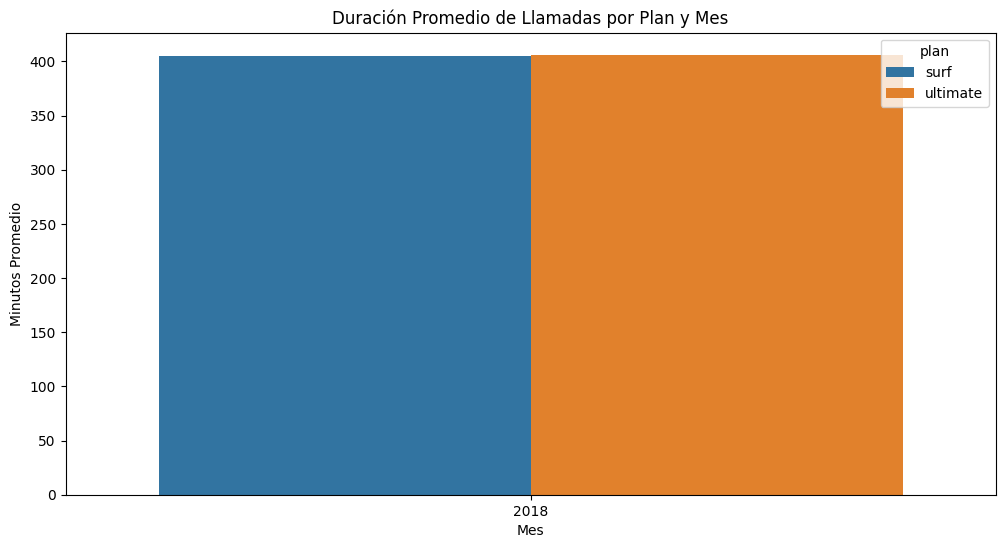

In [146]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
duracion_promedio = df_con_ingresos.groupby(['plan', 'month'])['minutes'].mean().reset_index()  # duracion promedio de llamadas por plan y mes 
plt.figure(figsize=(12, 6))  # este para crear el gráfico
sns.barplot(data=duracion_promedio, x='month', y='minutes', hue='plan')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Minutos Promedio')
plt.show()

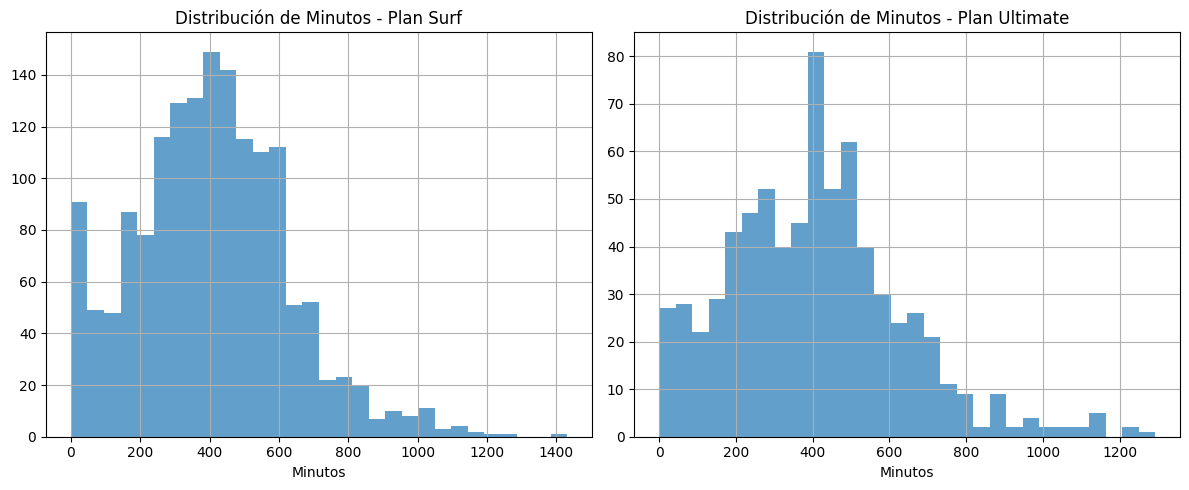

In [147]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df_con_ingresos[df_con_ingresos['plan'] == 'surf']['minutes'].hist(bins=30, alpha=0.7)
plt.title('Distribución de Minutos - Plan Surf')
plt.xlabel('Minutos')

plt.subplot(1, 2, 2)
df_con_ingresos[df_con_ingresos['plan'] == 'ultimate']['minutes'].hist(bins=30, alpha=0.7)
plt.title('Distribución de Minutos - Plan Ultimate')
plt.xlabel('Minutos')
plt.tight_layout()
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [148]:
# Calcula la media y la varianza de la duración mensual de llamadas.
print("Estadísticas básicas de minutos por plan:")  # 1.verifico los datos de duracion de llamadas
print(df_con_ingresos.groupby('plan')['minutes'].describe())



Estadísticas básicas de minutos por plan:
           count        mean         std  min     25%      50%       75%  \
plan                                                                       
surf      1573.0  404.762390  221.664397  0.0  255.47  401.760  543.6800   
ultimate   720.0  406.193083  227.246499  0.0  246.29  398.585  532.2275   

              max  
plan               
surf      1431.22  
ultimate  1292.09  


In [149]:
estadisticas_llamadas = df_con_ingresos.groupby('plan')['minutes'].agg(['mean', 'var'])
print("Media y varianza de duración de llamadas por plan:")
print(estadisticas_llamadas)    # 2. con esto calculo la media y la varianza de duracion de llamadas por plan  

Media y varianza de duración de llamadas por plan:
                mean           var
plan                              
surf      404.762390  49135.104891
ultimate  406.193083  51640.971402


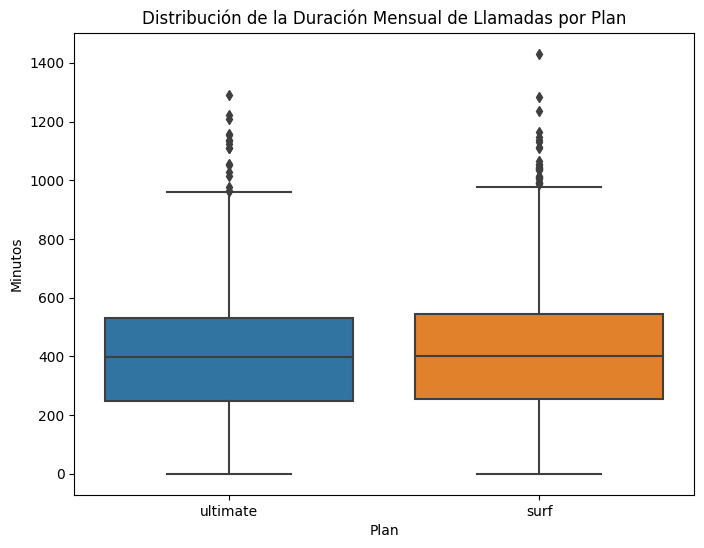

In [150]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_con_ingresos, x='plan', y='minutes')
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Minutos')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]
# Hay una media de minutos: Surf (404.76) contra Ultimate(406.19), la diferencia es minima solo de 1.43 minutos.
# con la variabilidad en el uso : varianza con Surf es de 49,135 contra 51,641 de Ultimate y estos últimos muestran ligeramente mas variablilidad.


### Mensajes

In [151]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_con_ingresos.groupby('plan')['messages'].describe()


,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,31.159568,33.566717,0.0,3.0,24.0,47.0,266.0
ultimate,720.0,37.551389,34.767179,0.0,7.0,30.0,61.0,166.0


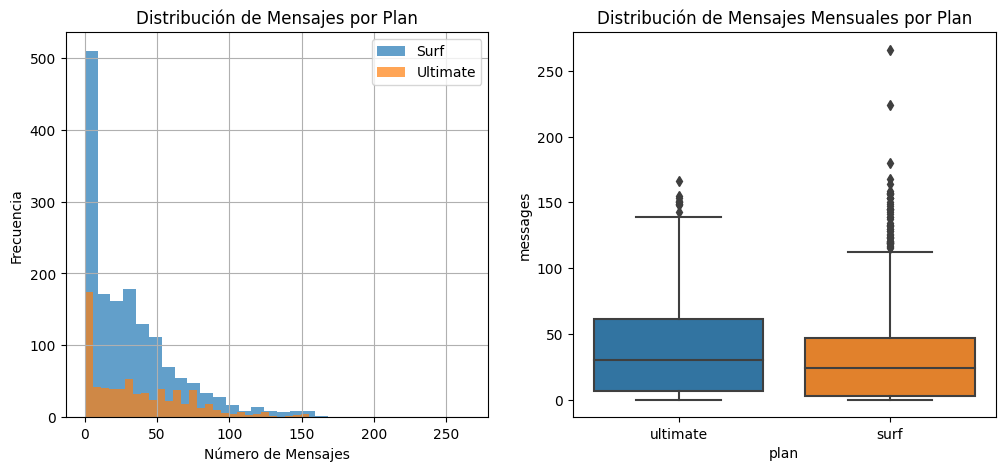

In [152]:
plt.figure(figsize=(12, 5)) #histograma mensajes

plt.subplot(1, 2, 1)   # histograma comparativo
df_con_ingresos[df_con_ingresos['plan'] == 'surf']['messages'].hist(bins=30, alpha=0.7, label='Surf')
df_con_ingresos[df_con_ingresos['plan'] == 'ultimate']['messages'].hist(bins=30, alpha=0.7, label='Ultimate')
plt.title('Distribución de Mensajes por Plan')
plt.xlabel('Número de Mensajes')
plt.ylabel('Frecuencia')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df_con_ingresos, x='plan', y='messages')
plt.title('Distribución de Mensajes Mensuales por Plan')
plt.show()



In [153]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
print("Estadísticas básicas de tráfico de Internet (MB) por plan:")  # 1. estadisticas descriptivas del tráfico de internet por plan 
print(df_con_ingresos.groupby('plan')['mb_used'].describe())


Estadísticas básicas de tráfico de Internet (MB) por plan:
           count          mean          std  min        25%       50%  \
plan                                                                    
surf      1573.0  16558.283490  8013.513327  0.0  11986.520  16829.31   
ultimate   720.0  17214.699694  7851.897435  0.0  12666.955  16858.34   

                 75%       max  
plan                            
surf      20999.6100  70931.59  
ultimate  21014.5275  46595.33  


Text(0, 0.5, 'MB Promedio')

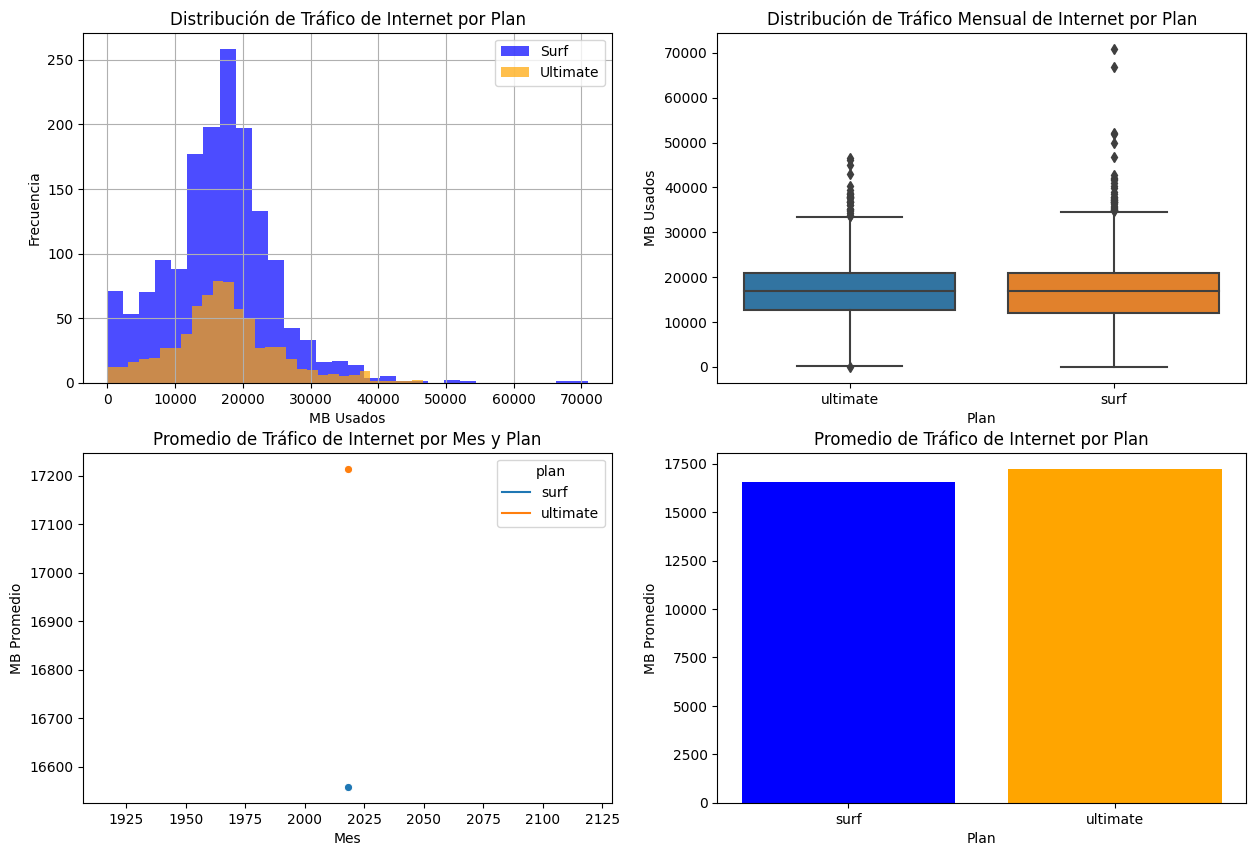

In [154]:
plt.figure(figsize=(15, 10))   # crear visualizaciones para el trafico de internet

plt.subplot(2, 2, 1)  #histograma comparativo
df_con_ingresos[df_con_ingresos['plan'] == 'surf']['mb_used'].hist(bins=30, alpha=0.7, label='Surf', color='blue')
df_con_ingresos[df_con_ingresos['plan'] == 'ultimate']['mb_used'].hist(bins=30, alpha=0.7, label='Ultimate', color='orange')
plt.title('Distribución de Tráfico de Internet por Plan')
plt.xlabel('MB Usados')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(2, 2, 2)
sns.boxplot(data=df_con_ingresos, x='plan', y='mb_used')
plt.title('Distribución de Tráfico Mensual de Internet por Plan')
plt.xlabel('Plan')
plt.ylabel('MB Usados')

plt.subplot(2, 2, 3)
promedio_internet = df_con_ingresos.groupby(['plan', 'month'])['mb_used'].mean().reset_index()
sns.lineplot(data=promedio_internet, x='month', y='mb_used', hue='plan', marker='o')
plt.title('Promedio de Tráfico de Internet por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('MB Promedio')

plt.subplot(2, 2, 4)
medias_internet = df_con_ingresos.groupby('plan')['mb_used'].mean()
plt.bar(medias_internet.index, medias_internet.values, color=['blue', 'orange'])
plt.title('Promedio de Tráfico de Internet por Plan')
plt.xlabel('Plan')
plt.ylabel('MB Promedio')

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]
#Se observa en el plan surf 31.16 mensajes promedio por mes mientras tantoene l Ultimate 37.55 mensajes por mes, los usuarios de Ultimate envían aproximadamente 6.4 mensajes más por mes.
# en el plan Surf la desviación estamdar es de 33.57 mensajes y en Ultimate es de 34.77, ambos planes muestran una variabilidad similar en el uso de mensajes.

### Internet

In [155]:
datos_de_internet['session_date'] = pd.to_datetime(datos_de_internet['session_date'])   #convertir tipo de datos

In [156]:
print("Sesiones con MB negativos:")
print(datos_de_internet[datos_de_internet['mb_used'] < 0].shape[0])   # verificar que no hay valores negativos

print("Sesiones con 0 MB mantenidas:", datos_de_internet[datos_de_internet['mb_used'] == 0].shape[0])  #el usuario se conecto peronouso datos

Sesiones con MB negativos:
0
Sesiones con 0 MB mantenidas: 13747


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]
#En el plan surf 16,558.28MB se usan promedio por mes, en el Ultimate 17,214.70 , los usuarios de Ultimeate consumen aproximadamente 656 MB más por mes que los Surf.
# Plan Surf desviacion estandar es de 8,013 MB mientras que en Ultimate es de 7,851 MB , ambos planes muestran variabilidad similiar.
# La mediana de Surf es de 16,829.31 contra la mediana de Ultimate que es de 16,858MB , las medianas son muy similares, indicando comportamientos parecidos en el usuario Tipico.
# Lo que se puede ver es que hay mayor consumo en Ultimate , los usuarios de planes premium tienden a usar mas datos.
# Ambis grupos de usuarios consumen más de los 15 GB incluidos en Surf , los usuarios Ultimate aqunque tienen 30 GB no los cionsumen todos , esto sugiere que el límite de datos influyen en el comportamiento de uso.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [157]:
print("Estadísticas descriptivas de ingresos mensuales por plan:")   # Análisis estadistico de los ingresos por plan  
print(df_con_ingresos.groupby('plan')['monthly_revenue'].describe())

print("\nMedia y varianza de ingresos por plan:")
estadisticas_ingresos = df_con_ingresos.groupby('plan')['monthly_revenue'].agg(['mean', 'var', 'std'])
print(estadisticas_ingresos)

Estadísticas descriptivas de ingresos mensuales por plan:
           count       mean        std   min   25%      50%        75%  \
plan                                                                     
surf      1573.0  57.293784  53.735882  20.0  20.0  36.6818  76.850586   
ultimate   720.0  72.116080  10.768848  70.0  70.0  70.0000  70.000000   

                 max  
plan                  
surf      581.328509  
ultimate  178.522764  

Media y varianza de ingresos por plan:
               mean          var        std
plan                                       
surf      57.293784  2887.544971  53.735882
ultimate  72.116080   115.968081  10.768848


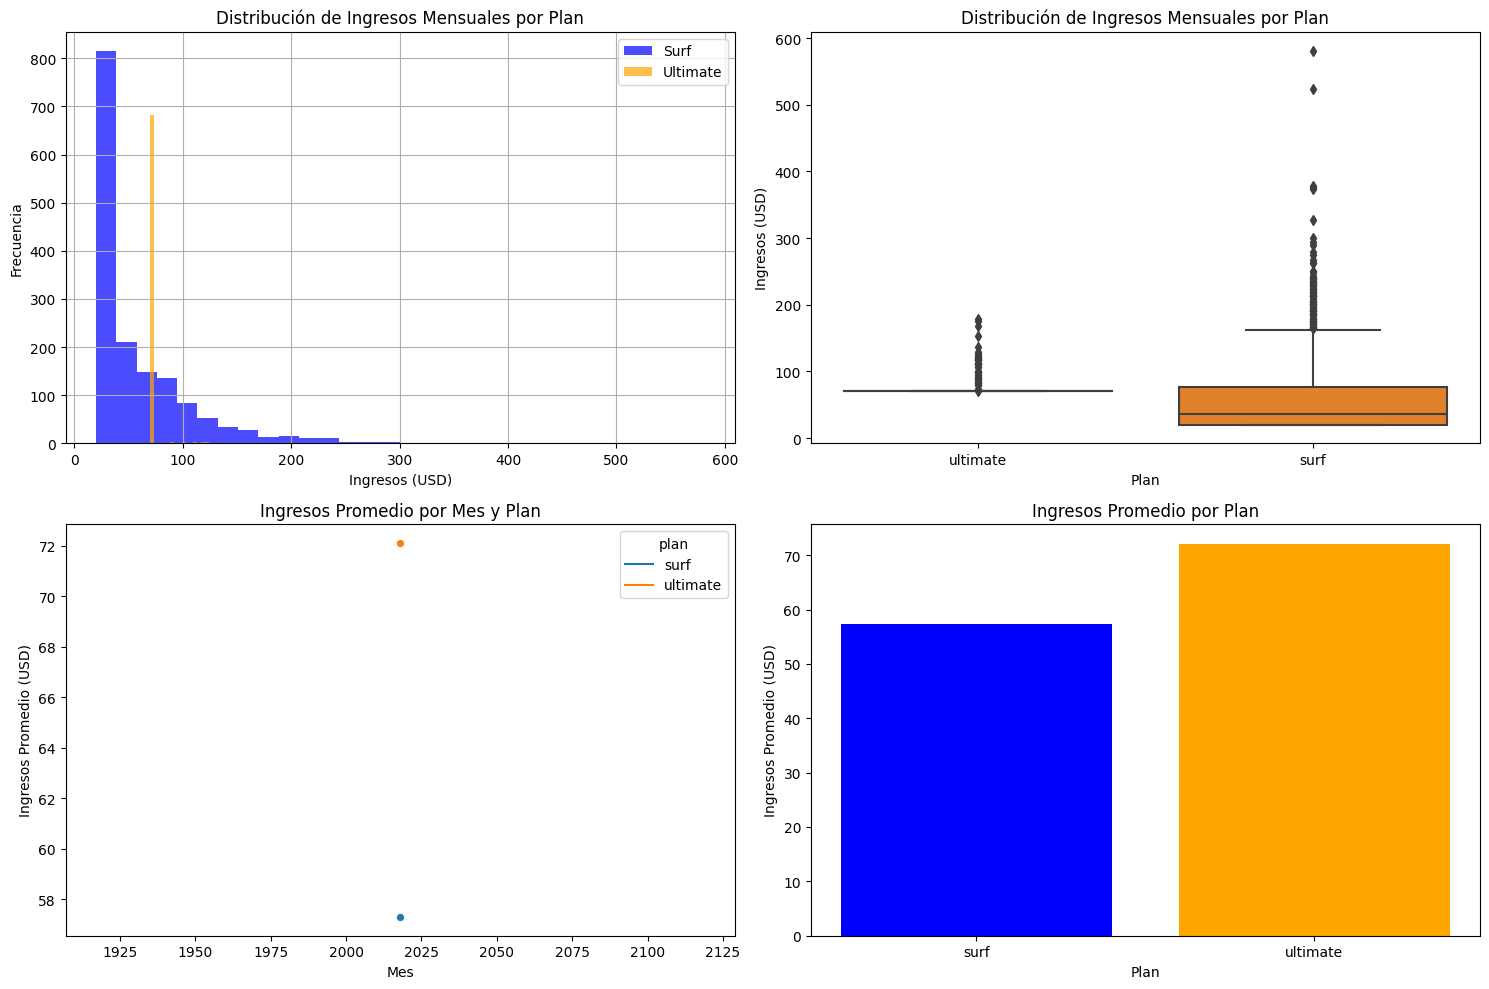

In [158]:
plt.figure(figsize=(15, 10))   # visualizacion de los ingresos por plan 

plt.subplot(2, 2, 1)    # Histograma comparativo
df_con_ingresos[df_con_ingresos['plan'] == 'surf']['monthly_revenue'].hist(bins=30, alpha=0.7, label='Surf', color='blue')
df_con_ingresos[df_con_ingresos['plan'] == 'ultimate']['monthly_revenue'].hist(bins=30, alpha=0.7, label='Ultimate', color='orange')
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.xlabel('Ingresos (USD)')
plt.ylabel('Frecuencia')
plt.legend()


plt.subplot(2, 2, 2)      # Boxplot
sns.boxplot(data=df_con_ingresos, x='plan', y='monthly_revenue')
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos (USD)')


plt.subplot(2, 2, 3)    # Ingresos promedio por mes
ingresos_por_mes = df_con_ingresos.groupby(['plan', 'month'])['monthly_revenue'].mean().reset_index()
sns.lineplot(data=ingresos_por_mes, x='month', y='monthly_revenue', hue='plan', marker='o')
plt.title('Ingresos Promedio por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Ingresos Promedio (USD)')


plt.subplot(2, 2, 4)    #Gráfico de barras comparativo
medias_ingresos = df_con_ingresos.groupby('plan')['monthly_revenue'].mean()
plt.bar(medias_ingresos.index, medias_ingresos.values, color=['blue', 'orange'])
plt.title('Ingresos Promedio por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Promedio (USD)')



plt.tight_layout()
plt.show()


In [159]:
ingresos_totales_por_plan = df_con_ingresos.groupby('plan')['monthly_revenue'].sum()   # Sumar todos los ingresos generados por cada plan 
print("Ingresos totales por plan:")
print(ingresos_totales_por_plan)
print(f"\nIngreso total del plan Surf: ${ingresos_totales_por_plan['surf']:,.2f}")
print(f"Ingreso total del plan Ultimate: ${ingresos_totales_por_plan['ultimate']:,.2f}")

Ingresos totales por plan:
plan
surf        90123.122338
ultimate    51923.577344
Name: monthly_revenue, dtype: float64

Ingreso total del plan Surf: $90,123.12
Ingreso total del plan Ultimate: $51,923.58


[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]
# El plan Surf genera 90,123.12 dolares mientras que el Ultimate 51,923.58
# Los ingresos por usuario en el Surf generan 57.29 dolares por mes mientras que el Ultimate 72.12 por mes.


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [160]:
# Prueba las hipótesis
# Hipótesis nula : No hay diferencias en los ingresos promedio entre los planes Surf y Ultimate
# Hipótesis alternativa: Si hay diferencia en los ingresos promedio entre los planes .

ingresos_surf = df_con_ingresos[df_con_ingresos['plan'] == 'surf']['monthly_revenue']   # Separar ingresos por plan
ingresos_ultimate = df_con_ingresos[df_con_ingresos['plan'] == 'ultimate']['monthly_revenue']

print("Datos de ingresos por plan:")   # 1. verificar datos correctos
print(f"Surf - Tamaño: {len(ingresos_surf)}, Media: ${ingresos_surf.mean():.2f}")
print(f"Ultimate - Tamaño: {len(ingresos_ultimate)}, Media: ${ingresos_ultimate.mean():.2f}")

from scipy.stats import shapiro

# Verificar normalidad para ingresos de Surf
stat_surf, p_surf = shapiro(ingresos_surf)
print(f"Surf - Estadístico: {stat_surf:.4f}, p-valor: {p_surf:.4f}")

# Verificar normalidad para ingresos de Ultimate  
stat_ultimate, p_ultimate = shapiro(ingresos_ultimate)
print(f"Ultimate - Estadístico: {stat_ultimate:.4f}, p-valor: {p_ultimate:.4f}")

from scipy.stats import ttest_ind

# Realizar la prueba t de Welch (no asume varianzas iguales)
# equal_var=False especifica que usamos la prueba de Welch
statistic, p_value = ttest_ind(ingresos_ultimate, ingresos_surf, equal_var=False)

print("=== PRUEBA T DE WELCH ===")
print(f"Estadístico t: {statistic:.4f}")
print(f"P-valor: {p_value:.6f}")
print(f"Nivel de significancia (α): 0.05")

alpha = 0.05   # interpretación de resultados

print("\n=== INTERPRETACIÓN ===")
if p_value < alpha:
    print(f"P-valor ({p_value:.6f}) < α ({alpha})")
    print("RECHAZAMOS la hipótesis nula")
    print("Conclusión: SÍ existe diferencia significativa en los ingresos promedio entre planes")
else:
    print(f"P-valor ({p_value:.6f}) >= α ({alpha})")
    print("NO RECHAZAMOS la hipótesis nula")
    print("Conclusión: NO hay evidencia suficiente de diferencia significativa")

print(f"\nDiferencia en medias: ${ingresos_ultimate.mean() - ingresos_surf.mean():.2f}")


Datos de ingresos por plan:
Surf - Tamaño: 1573, Media: $57.29
Ultimate - Tamaño: 720, Media: $72.12
Surf - Estadístico: 0.7097, p-valor: 0.0000
Ultimate - Estadístico: 0.2005, p-valor: 0.0000
=== PRUEBA T DE WELCH ===
Estadístico t: 10.4894
P-valor: 0.000000
Nivel de significancia (α): 0.05

=== INTERPRETACIÓN ===
P-valor (0.000000) < α (0.05)
RECHAZAMOS la hipótesis nula
Conclusión: SÍ existe diferencia significativa en los ingresos promedio entre planes

Diferencia en medias: $14.82


In [ ]:
# Eleji la prueba T de  Welch( que es parámetrica) por el tamaño de la muestra que es grande ya que el plan Surf tiene 1573 observaciones y el Ultimate 720 , ambas son mayor a 30 lo que activa el teorema de Limite central.
# Este teorema dice : con muestras grandes ( mas de 30)la distribución de las medias muestrales se aproxima a una distribucion normal, independientemente de la distribución original de los datos.
# Esto significa que aunque los datos de ingreso no sean normales la distribución de las medias si lo será.

In [161]:
from scipy.stats import mannwhitneyu

# Realizar la prueba Mann-Whitney U
# alternative='two-sided' para prueba bilateral
statistic, p_value = mannwhitneyu(ingresos_ultimate, ingresos_surf, 
                                  alternative='two-sided')

print("=== PRUEBA MANN-WHITNEY U ===")
print(f"Estadístico U: {statistic}")
print(f"P-valor: {p_value:.6f}")
print(f"Nivel de significancia (α): 0.05")

alpha = 0.05  # Interpretacion de resultados 

print("\n=== INTERPRETACIÓN ===")
if p_value < alpha:
    print(f"P-valor ({p_value:.6f}) < α ({alpha})")
    print("RECHAZAMOS la hipótesis nula")
    print("Conclusión: SÍ existe diferencia significativa entre las distribuciones de ingresos")
else:
    print(f"P-valor ({p_value:.6f}) >= α ({alpha})")
    print("NO RECHAZAMOS la hipótesis nula")
    print("Conclusión: NO hay evidencia suficiente de diferencia significativa")

# Estadísticas descriptivas adicionales
print(f"\nMediana Plan Surf: ${ingresos_surf.median():.2f}")
print(f"Mediana Plan Ultimate: ${ingresos_ultimate.median():.2f}")

=== PRUEBA MANN-WHITNEY U ===
Estadístico U: 814504.0
P-valor: 0.000000
Nivel de significancia (α): 0.05

=== INTERPRETACIÓN ===
P-valor (0.000000) < α (0.05)
RECHAZAMOS la hipótesis nula
Conclusión: SÍ existe diferencia significativa entre las distribuciones de ingresos

Mediana Plan Surf: $36.68
Mediana Plan Ultimate: $70.00


In [ ]:
# Tambièn quise hacer la prueba Mann-Witney u por que los ingresos de telecomunicaciones No siguen una distribución normal , hay muchos usuarios que pagan solo la tarifa base , otros usuarios exceden límites y pagan extras .
# Datos no normales (los ingresos no sigen una distribución  normal )
# No se ve afectada por valores atípicos (usuarios con gastos extremos)
# Determina si un plan tiende a generar más ingresos 
# Más confiable para tomar decisiones empresariales

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [162]:
# Prueba las hipótesis

print("Ciudades únicas en los datos:")   # 1. Ver que ciudades son únicas en los datos
ciudades_unicas = datos_usuarios['city'].unique()
for ciudad in sorted(ciudades_unicas):
    print(f"  - {ciudad}")

print(f"\nTotal de ciudades: {len(ciudades_unicas)}")

ciudades_ny_nj = []    # 2. buscar ciudades que contengan NY O NJ 
for ciudad in ciudades_unicas:
    if 'NY' in ciudad or 'NJ' in ciudad or 'New York' in ciudad or 'New Jersey' in ciudad:
        ciudades_ny_nj.append(ciudad)

print("Ciudades del área NY-NJ encontradas:")
for ciudad in ciudades_ny_nj:
    print(f"  - {ciudad}")


    
usuarios_ny_nj = datos_usuarios[datos_usuarios['city'].isin(ciudades_ny_nj)]   # 3. contar usuarios en cada región 
usuarios_otras_regiones = datos_usuarios[~datos_usuarios['city'].isin(ciudades_ny_nj)]

print(f"Usuarios en NY-NJ: {len(usuarios_ny_nj)}")
print(f"Usuarios en otras regiones: {len(usuarios_otras_regiones)}")


Ciudades únicas en los datos:
  - Albany-Schenectady-Troy, NY MSA
  - Albuquerque, NM MSA
  - Atlanta-Sandy Springs-Roswell, GA MSA
  - Austin-Round Rock-Georgetown, TX MSA
  - Bakersfield, CA MSA
  - Baltimore-Columbia-Towson, MD MSA
  - Baton Rouge, LA MSA
  - Birmingham-Hoover, AL MSA
  - Boston-Cambridge-Newton, MA-NH MSA
  - Bridgeport-Stamford-Norwalk, CT MSA
  - Buffalo-Cheektowaga, NY MSA
  - Cape Coral-Fort Myers, FL MSA
  - Charleston-North Charleston, SC MSA
  - Charlotte-Concord-Gastonia, NC-SC MSA
  - Chicago-Naperville-Elgin, IL-IN-WI MSA
  - Cincinnati, OH-KY-IN MSA
  - Cleveland-Elyria, OH MSA
  - Colorado Springs, CO MSA
  - Columbia, SC MSA
  - Columbus, OH MSA
  - Dallas-Fort Worth-Arlington, TX MSA
  - Dayton-Kettering, OH MSA
  - Denver-Aurora-Lakewood, CO MSA
  - Detroit-Warren-Dearborn, MI MSA
  - El Paso, TX MSA
  - Fresno, CA MSA
  - Grand Rapids-Kentwood, MI MSA
  - Greensboro-High Point, NC MSA
  - Houston-The Woodlands-Sugar Land, TX MSA
  - Indianapolis-Car

In [ ]:
# hipótesis nula : el ingreso promedio de los usuarios de la tarifa Ultimate es igual al ingreso promedio de los usuarios de la tarifa Surf .
# hipótesis alternativa: El ingreso promedio de los usuarios de la tarifa Ultimate es diferente al ingreso promedio de los usuarios de la tarifa Surf

In [ ]:
# hipòtesis comparaciòn regional
# hipotesis nula: El ingreso promedio de los usuarios en el área de Nueva York - Nueva Jersey es igual al ingreso promedio de los usuarios de otras regiones.
# hipótesis alternativa: El ingreso promedio de los usuarios en el área de Nueva York - Nueva Jersey es diferente al ingreso promedio de los usuarios de otras regiones .

In [165]:
from scipy.stats import mannwhitneyu    # realizacion de la prueba Mann Whiteney U
                                        # hipótesis 1

# Separar ingresos por plan
ingresos_surf = df_con_ingresos[df_con_ingresos['plan'] == 'surf']['monthly_revenue']
ingresos_ultimate = df_con_ingresos[df_con_ingresos['plan'] == 'ultimate']['monthly_revenue']

# Prueba Mann-Whitney U
statistic1, p_value1 = mannwhitneyu(ingresos_ultimate, ingresos_surf, 
                                    alternative='two-sided')

print(f"Estadístico U: {statistic1}")
print(f"P-valor: {p_value1:.6f}")

Estadístico U: 814504.0
P-valor: 0.000000


In [167]:
# Hipótesis 2
# NY-NJ contra otras regiones

df_con_ingresos_region = df_con_ingresos.merge(    # 1. crear colunma de región en DF con ingresos
    datos_usuarios[['user_id', 'city']], 
    on='user_id', 
    how='left'
)

ciudades_ny_nj = [            # 2. crear la columna región
    'New York-Newark-Jersey City, NY-NJ-PA MSA',
    'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
    'Buffalo-Cheektowaga, NY MSA',
    'Albany-Schenectady-Troy, NY MSA',
    'Rochester, NY MSA'
]

df_con_ingresos_region['region'] = df_con_ingresos_region['city'].apply(
    lambda x: 'NY-NJ' if x in ciudades_ny_nj else 'Otras'
)




In [168]:
# Separar ingresos por región             # realizacion de la hipótesis
ingresos_ny_nj = df_con_ingresos_region[df_con_ingresos_region['region'] == 'NY-NJ']['monthly_revenue']
ingresos_otras = df_con_ingresos_region[df_con_ingresos_region['region'] == 'Otras']['monthly_revenue']

# Prueba Mann-Whitney U
statistic2, p_value2 = mannwhitneyu(ingresos_ny_nj, ingresos_otras, 
                                    alternative='two-sided')

print(f"Estadístico U: {statistic2}")
print(f"P-valor: {p_value2:.6f}")

Estadístico U: 399916.5
P-valor: 0.001497


In [ ]:
# Eleji la prueba Mann-Whitney U para ambas hipótesis por que los ingresos no siguen una distribuciòn normal, esta prueba no se ve afectada por valores atípicos, es aporpiada para comparaciones ya que determina si un grupo tiende a tener valores mayores, es mas confiable para deciciones empresariales y usar la misma prueba facilita la compración de resultados.    

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

# El propósito del proyecto era analizar el comportamiento de 500 clientes de Megaline durante el 2018 , comparar la rentabilidad entre las tarifas Surf que son 20 dolares al mes y Ultimate que son 70 dolares al mes y determinar cuál tarifa genera mas ingresos para optimizar el presupuesto publicitario.
# Hallazgos encontrados en llamadas:
# Ambos planes muestran comportamiento similiar en duracion de llamadas ( surf 404.76 min contra Ultimate 406.19 minutos), la variabilidad es comparable entre planes.
# Hallazgos encontrados en mensajes:
# Los usuarios Ultimate envían mas mensajes (37.55 contra 31.16 )por mes, la diferencia es de aproximadamente 64 mensajes por mes.
# Hllazgos encontrados en internet:
# Los usuarios Ultimate consumen mas datos (17,214MB contra 16,558MB por mes), ambos grupos superan los límites incluidos en Surf ( 15 GB)
# Hallazgos encontrados en rentabilidad:
# Ultimate genera 72.12 dolares promedio por usuario en el mes mientras que Surf geenra 57.29 dolares por ususario en el mes.
# Ingresos totales:
# Surf genera 90,123.58 dolares al mes con 1573 usuarios mientras qeu Ultimate genera 51,923.58 dolares al mes con 720 usuarios.
# Enn las pruebas estadìsticas de diferencia entre palnes se rechaza la hipótesis nula y existe una diferencia significativa en ingresos entre planes.
# Hipótesis de diferencia regional:
# Se rechaza la hipótesis nula , los usuarios de Nueva York generan diferentes ingresos a otras regiones.

